# 1D CNN Bike Demand Forecast Time series -- Deep Learning 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/My Drive/Bike-demand/master_final.csv')


df['bikes']=df['bikes'].astype('float16')


df['pressure']=df['pressure'].astype('float16')
df['temperature']=df['temperature'].astype('float16')
df['wind']=df['wind'].astype('float16')
df['altitude']=df['altitude'].astype('float16')

df['lag_beau_temps']=df['lag_beau_temps'].astype('float16')
df['lag_nuageux']=df['lag_nuageux'].astype('float16')
df['lag_pluvieux']=df['lag_pluvieux'].astype('float16')
df['lag_orage']=df['lag_orage'].astype('float16')
df['lag_30m']=df['lag_30m'].astype('float16')
df['lag_7j']=df['lag_7j'].astype('float16')


df['station']=df['station'].astype('int16')
df['clouds']=df['clouds'].astype('int16')
df['humidity']=df['humidity'].astype('int16')
df['pressure']=df['pressure'].astype('int16')


df['beau_temps']=df['beau_temps'].astype('int8')
df['nuageux']=df['nuageux'].astype('int8')
df['pluvieux']=df['pluvieux'].astype('int8')
df['pluie']=df['pluie'].astype('int8')
df['orage']=df['orage'].astype('int8')


df['hour']=df['hour'].astype('int8')
df['day']=df['day'].astype('int8')
df['month']=df['month'].astype('int8')
df['weekday']=df['weekday'].astype('int16')


df=df.set_index('datetime')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10340547 entries, 2016-04-01 00:00:00 to 2016-10-05 03:30:00
Data columns (total 24 columns):
 #   Column          Dtype  
---  ------          -----  
 0   bikes           float16
 1   station         int16  
 2   clouds          int16  
 3   humidity        int16  
 4   pressure        int16  
 5   temperature     float16
 6   wind            float16
 7   altitude        float16
 8   beau_temps      int8   
 9   nuageux         int8   
 10  pluvieux        int8   
 11  pluie           int8   
 12  orage           int8   
 13  lag_beau_temps  float16
 14  lag_nuageux     float16
 15  lag_pluvieux    float16
 16  lag_pluie       float64
 17  lag_orage       float16
 18  hour            int8   
 19  day             int8   
 20  month           int8   
 21  weekday         int16  
 22  lag_30m         float16
 23  lag_7j          float16
dtypes: float16(10), float64(1), int16(5), int8(8)
memory usage: 532.5+ MB


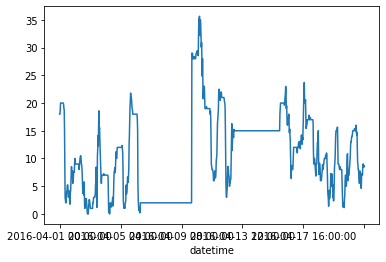

In [ ]:
df['bikes'][:1000].plot()

In [4]:
drop_cols = ['lag_30m', 'lag_pluvieux']
df = df.drop(drop_cols, axis= 1)

In [5]:
y = df['bikes']
X= df.drop(['bikes'], axis=1)
train_size=int(len(df) *0.7)
test_size = int(len(df)) - train_size
test_size = test_size+1

print(train_size)
print(test_size)
x_train, y_train = X[:train_size].dropna(), y[:train_size].dropna()
x_val, y_val = X[train_size:].dropna(), y[train_size:].dropna()

7238382
3102166


In [6]:
X_train_series = x_train.values.reshape((x_train.shape[0], x_train.shape[1], 1))
X_valid_series = x_val.values.reshape((x_val.shape[0], x_val.shape[1], 1))
print('Train set shape', X_train_series.shape)
print('Validation set shape', X_valid_series.shape)

Train set shape (7238382, 21, 1)
Validation set shape (3102165, 21, 1)


In [7]:
from keras import optimizers
from keras.utils import plot_model
from keras.models import Sequential, Model
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten,BatchNormalization, Dropout

model_cnn = Sequential()
model_cnn.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_series.shape[1], X_train_series.shape[2])))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(50, activation='relu'))
model_cnn.add(Dense(1))
model_cnn.compile(loss='mae', optimizer='adam')
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 20, 64)            192       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 10, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 640)               0         
_________________________________________________________________
dense (Dense)                (None, 50)                32050     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 32,293
Trainable params: 32,293
Non-trainable params: 0
_________________________________________________________________


In [8]:
cnn_history = model_cnn.fit(X_train_series, y_train, validation_data=(X_valid_series, y_val), epochs=10, verbose=1, shuffle=False, batch_size=100)

Epoch 1/10
72384/72384 [==============================] - 189s 3ms/step - loss: 7.1628 - val_loss: 8.1520
Epoch 2/10
72384/72384 [==============================] - 190s 3ms/step - loss: 6.9109 - val_loss: 7.7588
Epoch 3/10
72384/72384 [==============================] - 186s 3ms/step - loss: 6.8925 - val_loss: 7.6437
Epoch 4/10
72384/72384 [==============================] - 188s 3ms/step - loss: 6.8905 - val_loss: 7.5843
Epoch 5/10
72384/72384 [==============================] - 187s 3ms/step - loss: 6.8884 - val_loss: 7.5514
Epoch 6/10
72384/72384 [==============================] - 187s 3ms/step - loss: 6.8874 - val_loss: 7.5309
Epoch 7/10
72384/72384 [==============================] - 187s 3ms/step - loss: 6.8878 - val_loss: 7.5250
Epoch 8/10
72384/72384 [==============================] - 187s 3ms/step - loss: 6.8884 - val_loss: 7.5186
Epoch 9/10
72384/72384 [==============================] - 187s 3ms/step - loss: 6.8897 - val_loss: 7.5117
Epoch 10/10
72384/72384 [=====================

In [9]:
model_cnn.save("/content/drive/My Drive/Bike-demand/NoLag-model_1.h5")
#model_cnn = load_model('/content/drive/My Drive/Bike-demand/NoLag-model_1.h5')

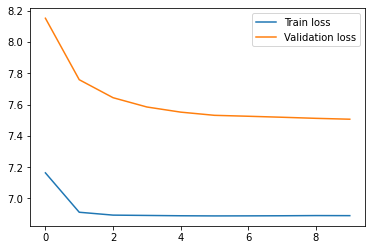

In [10]:
plt.plot(cnn_history.history['loss'], label='Train loss')
plt.plot(cnn_history.history['val_loss'], label='Validation loss')
plt.legend(loc='best')


In [11]:
pred= model_cnn.predict(X_valid_series)

In [12]:
val =pd.DataFrame(y_val)
val["pred"]=pred

In [13]:
val

,bikes,pred
datetime,,
2016-05-10 09:30:00,19.593750,26.893917
2016-05-10 10:00:00,20.328125,27.590651
2016-05-10 10:30:00,19.000000,28.495543
2016-05-10 11:00:00,19.328125,28.778931
2016-05-10 11:30:00,19.671875,28.421440
...,...,...
2016-10-05 01:30:00,3.000000,10.918598
2016-10-05 02:00:00,2.000000,10.973380
2016-10-05 02:30:00,2.000000,11.316381


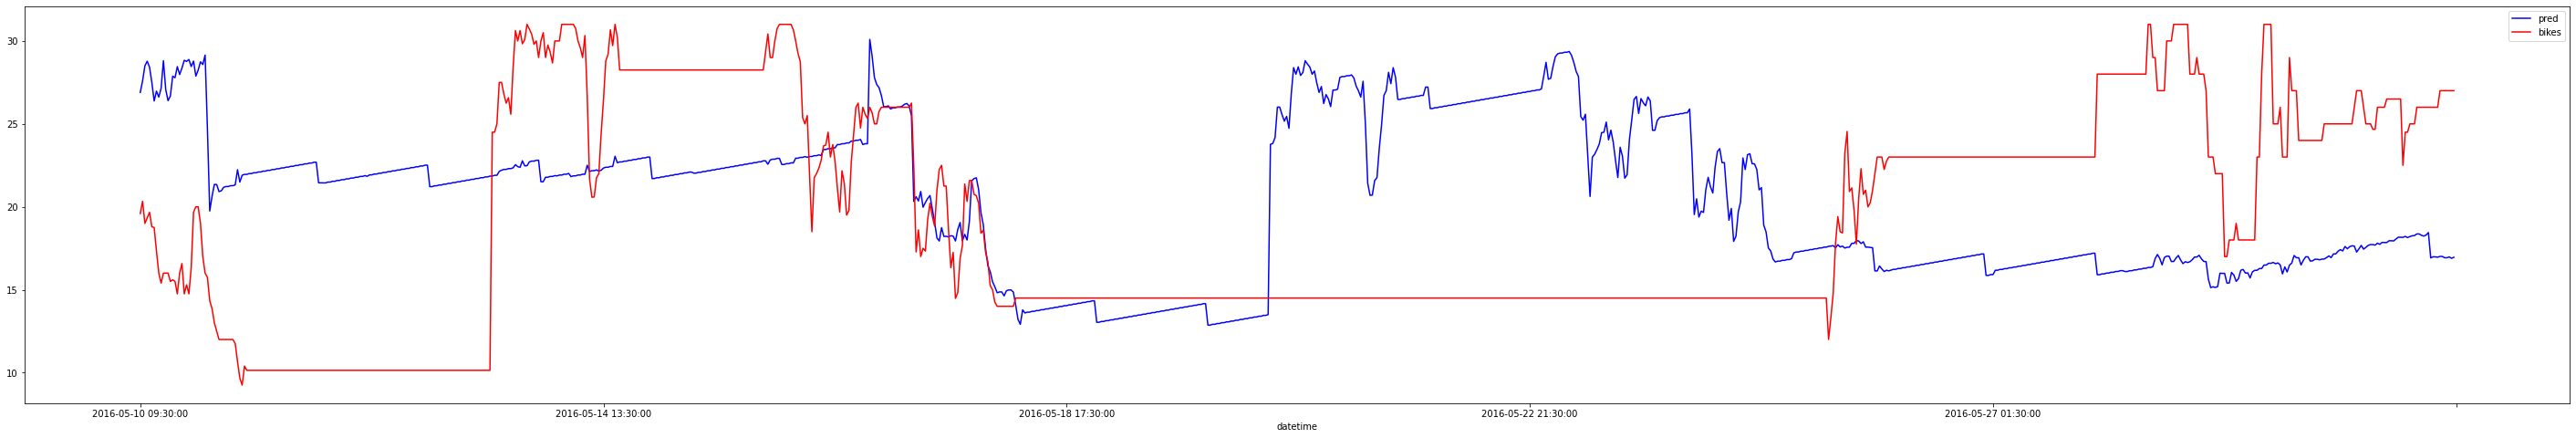

In [15]:
ax = val['pred'][:1000].plot(figsize=(50,8), legend=True, color='blue')
val['bikes'][:1000].plot(legend=True, color='red', figsize=(50,8))

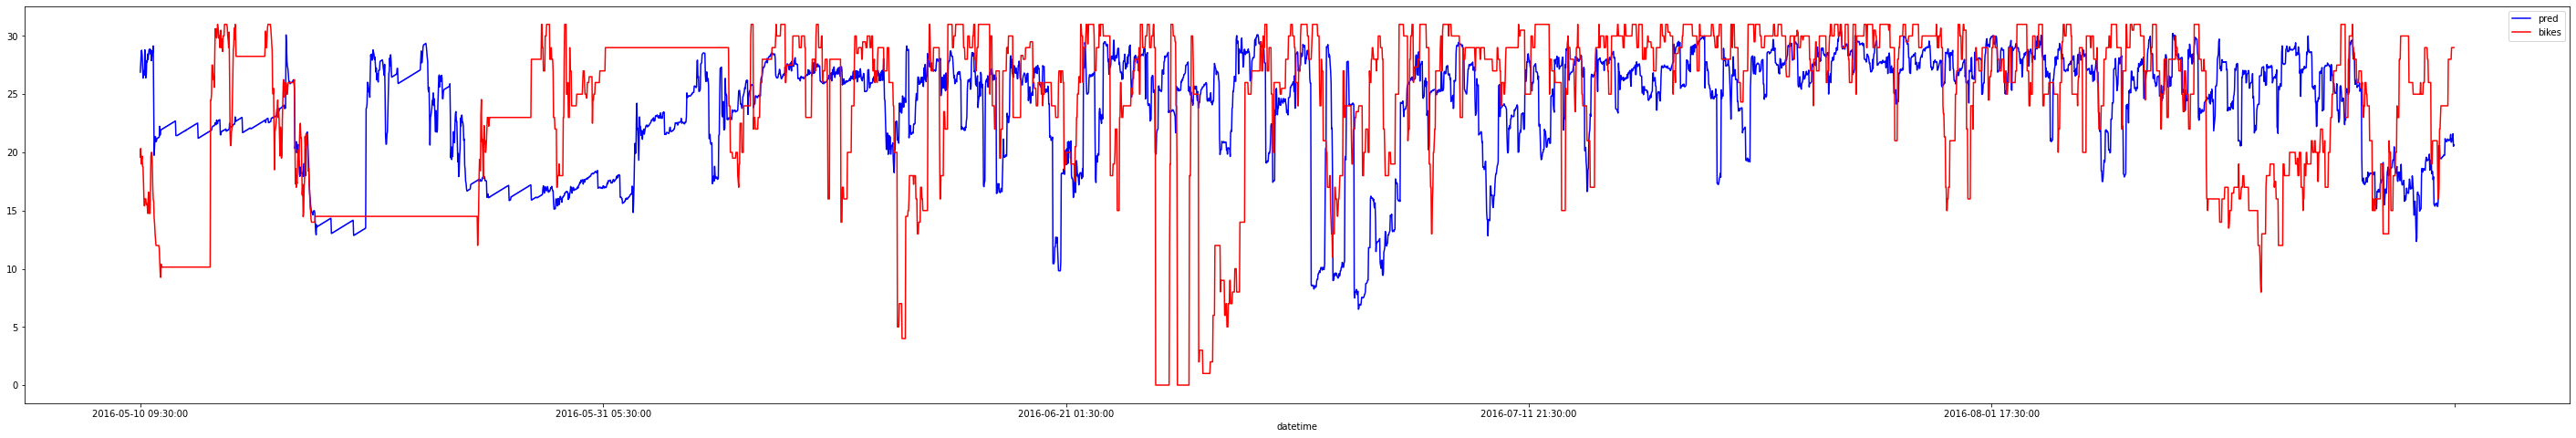

In [16]:
ax = val['pred'][:5000].plot(figsize=(50,8), legend=True, color='blue')
val['bikes'][:5000].plot(legend=True, color='red', figsize=(50,8))

In [17]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(( y_true.mean() - y_pred.mean() ) / y_true.mean() )) * 100
mean_absolute_percentage_error(np.array(val['bikes']) , np.array( val['pred'])) 



5.167309939861298

In [18]:
from statsmodels.tools.eval_measures import meanabs
error=meanabs(val['pred'], val['bikes'])
error

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


7.5059934

In [19]:
MAPE=mean_absolute_percentage_error(np.array(val['bikes'][:5000]) , np.array( val['pred'][:5000]))
print('MAPE error est :',MAPE)

error=meanabs(val['pred'][:5000], val['bikes'][:5000])
print('MAE error est :',error)


MAPE error est : 1.5047336928546429
MAE error est : 5.822141


# Let's Try with a higher number of epochs 

In [20]:
cnn_history = model_cnn.fit(X_train_series, y_train, validation_data=(X_valid_series, y_val), epochs=25, verbose=1, shuffle=False, batch_size=100)

Epoch 1/25
72384/72384 [==============================] - 187s 3ms/step - loss: 6.8887 - val_loss: 7.5033
Epoch 2/25
72384/72384 [==============================] - 188s 3ms/step - loss: 6.8890 - val_loss: 7.4987
Epoch 3/25
72384/72384 [==============================] - 187s 3ms/step - loss: 6.8885 - val_loss: 7.4947
Epoch 4/25
72384/72384 [==============================] - 187s 3ms/step - loss: 6.8885 - val_loss: 7.4792
Epoch 5/25
72384/72384 [==============================] - 187s 3ms/step - loss: 6.8909 - val_loss: 7.4709
Epoch 6/25
72384/72384 [==============================] - 185s 3ms/step - loss: 6.8916 - val_loss: 7.4576
Epoch 7/25
72384/72384 [==============================] - 186s 3ms/step - loss: 6.8912 - val_loss: 7.4446
Epoch 8/25
72384/72384 [==============================] - 188s 3ms/step - loss: 6.8920 - val_loss: 7.4348
Epoch 9/25
72384/72384 [==============================] - 186s 3ms/step - loss: 6.8937 - val_loss: 7.4207
Epoch 10/25
72384/72384 [=====================

In [21]:
model_cnn.save("/content/drive/My Drive/Bike-demand/NoLag-model_1_25epochs.h5")
#model_cnn = load_model('/content/drive/My Drive/Bike-demand/NoLag-model_1.h5')

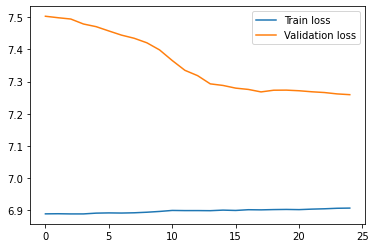

In [22]:
plt.plot(cnn_history.history['loss'], label='Train loss')
plt.plot(cnn_history.history['val_loss'], label='Validation loss')
plt.legend(loc='best')


In [23]:
pred= model_cnn.predict(X_valid_series)

In [24]:
val =pd.DataFrame(y_val)
val["pred"]=pred
val

,bikes,pred
datetime,,
2016-05-10 09:30:00,19.593750,25.935246
2016-05-10 10:00:00,20.328125,26.489517
2016-05-10 10:30:00,19.000000,27.449389
2016-05-10 11:00:00,19.328125,27.565201
2016-05-10 11:30:00,19.671875,27.185995
...,...,...
2016-10-05 01:30:00,3.000000,8.110690
2016-10-05 02:00:00,2.000000,8.216040
2016-10-05 02:30:00,2.000000,8.373487


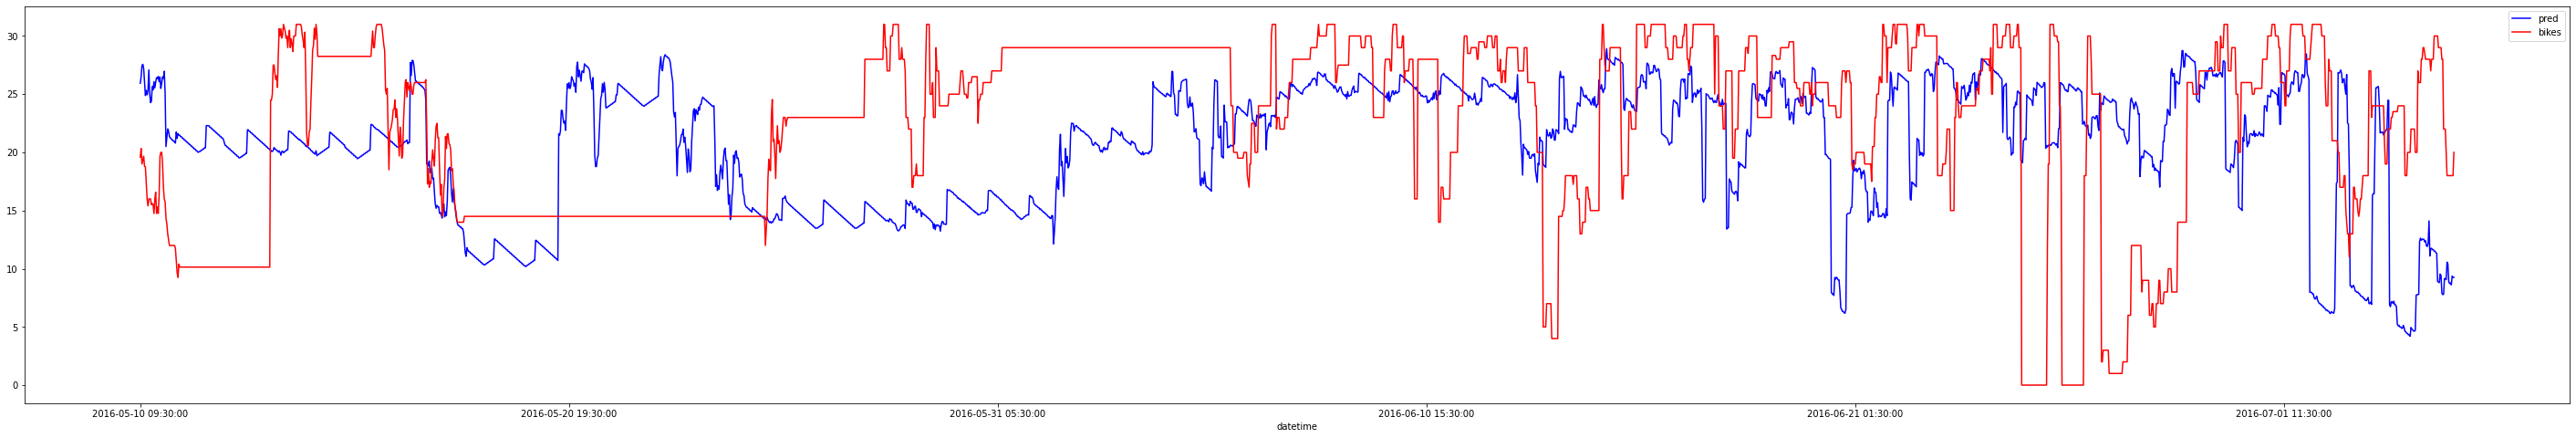

In [25]:
ax = val['pred'][:2699].plot(figsize=(50,8), legend=True, color='blue')
val['bikes'][:2699].plot(legend=True, color='red', figsize=(50,8))

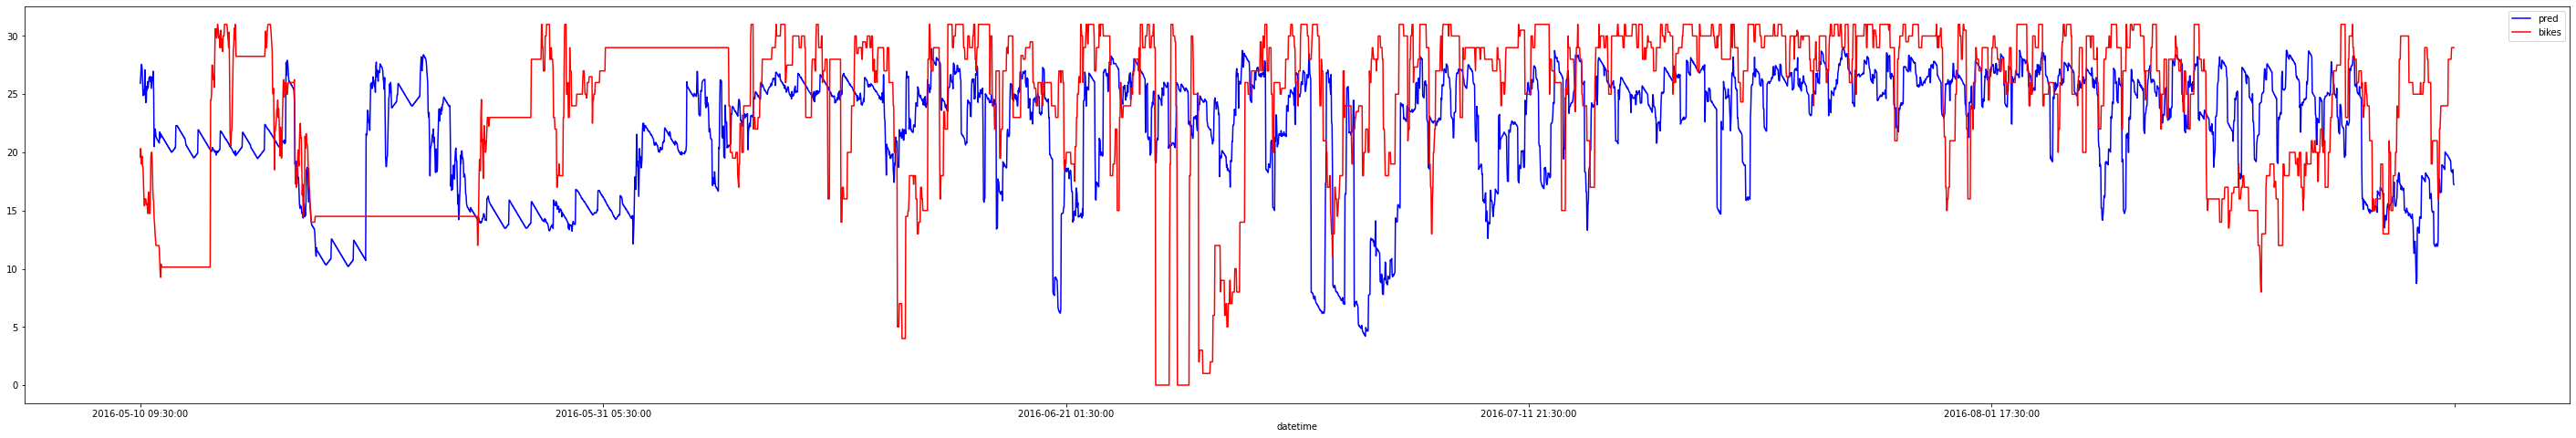

In [26]:
ax = val['pred'][:5000].plot(figsize=(50,8), legend=True, color='blue')
val['bikes'][:5000].plot(legend=True, color='red', figsize=(50,8))

In [27]:
mean_absolute_percentage_error(np.array(val['bikes']) , np.array( val['pred'])) 


1.1640568263828754

In [28]:
error=meanabs(val['pred'], val['bikes'])
error

7.2593765

In [29]:
MAPE=mean_absolute_percentage_error(np.array(val['bikes'][:5000]) , np.array( val['pred'][:5000]))
print('MAPE error est :',MAPE)

error=meanabs(val['pred'][:5000], val['bikes'][:5000])
print('MAE error est :',error)


MAPE error est : 8.45760926604271
MAE error est : 6.4302077
